## Thinking to Travel to Boston After the Lockdown

If you are interested in traveling to Boston after the Lockdown and use AirBnB as a guest, it is a good idea to check the information available. Boston Airbnb Open Data in Kaggle is the start point, this dataset describes the listing activity of homestays in Boston, MA.  

### Content

The following Airbnb activity is included in this Boston dataset:

* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day

### Project Scope

The goal of this project is to answer three business questions using [Boston Airbnb Open Data in Kaggle](https://www.kaggle.com/airbnb/boston): 

1. What is the cost variation for homestays in Boston?
2. How neighborhood and review scores rating relate with each other?
3. What are the rules, facilities and room type most offered?

In [38]:
# libraries needed for answering the questions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question 1:

### What is the cost variation for homestays in Boston?

For the firts question, the calendar data set will be used. Before that, the variable `date` has to be parsed and `price` needs two tranformations; first, remove symbols and then change the type from object to float.

In [39]:
# Read calendar dataset and parse dates
calendar = pd.read_csv("./calendar.csv", low_memory=False, parse_dates=['date'])

# Remove price column symbols and change type to float
calendar['price'] = calendar['price'].str.replace('[\$\,]','').astype(float)
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [40]:
# Take a look of the head
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [41]:
# Check NaN
calendar.isna().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [42]:
# Statistics of price
calendar.price.describe()

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64

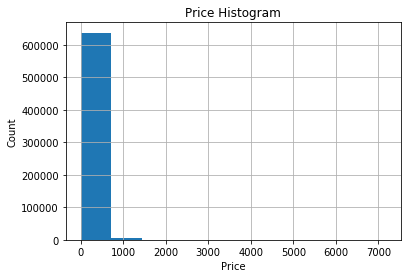

In [43]:
# Histogram of the price
calendar['price'].hist();

# Customize the plot
plt.title("Price Histogram")
plt.xlabel("Price")
plt.ylabel("Count")
plt.xticks(rotation=0);

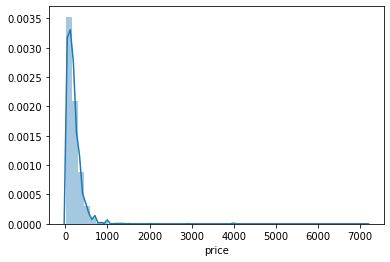

In [44]:
# Using seaborn to see the price distribution.
sns.distplot(calendar.price)
plt.show()

`price` is positively skewed and there are 665853 missing values. We can apply np.log to `price` to make variable closer to a normal distribution.

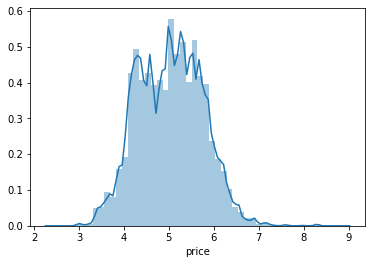

In [45]:
# price log distribution
sns.distplot(np.log(calendar.price))
plt.show()

Now, let's apply some transformations to `date` variable to see the `price` variation in diffent periods of time.

In [46]:
# Add datetime parameters for date
calendar["priceYear"] = calendar.date.dt.year
calendar["priceMonth"] = calendar.date.dt.month
calendar["priceDayofweek"] = calendar.date.dt.dayofweek

calendar.head()

,listing_id,date,available,price,priceYear,priceMonth,priceDayofweek
0,12147973,2017-09-05,f,NaN,2017,9,1
1,12147973,2017-09-04,f,NaN,2017,9,0
2,12147973,2017-09-03,f,NaN,2017,9,6
3,12147973,2017-09-02,f,NaN,2017,9,5
4,12147973,2017-09-01,f,NaN,2017,9,4


For better understanding, let's make some plots to visualize the price variation according to year, month and day of the week.

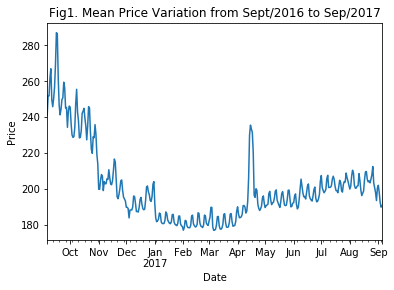

In [47]:
# Plot price for the entire dataset dates
# the data will be filtered to consider only observations where available is True. Besides, 
# the mean of the price will be considered for the entire analysis.

calendar_avail = calendar[calendar['available'] == "t"]
calendar_avail.groupby('date').mean().price.plot();

# Customize the plot
plt.title("Fig1. Mean Price Variation from Sept/2016 to Sep/2017")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=0);

Taking into account information from the entire dataset (Sept 2016 - Sept 2017), the price tends to go down. Let's see what happend with price if we consider new datetime variables in the dataset.

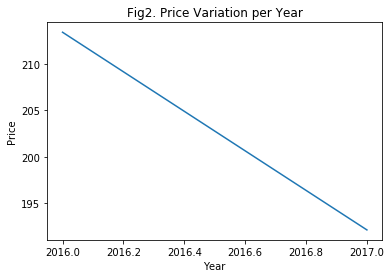

In [48]:
# Plot price per Year
calendar_avail.groupby('priceYear').mean().price.plot();

# Customize the plot
plt.title("Fig2. Price Variation per Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=0);

Definitely, the mean price is going down as we can see in Fig 2.

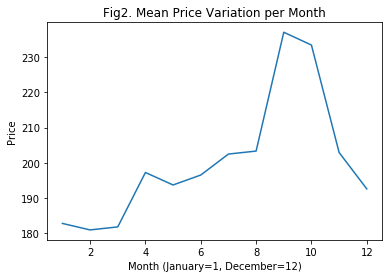

In [49]:
# Plot price per Month
calendar_avail.groupby('priceMonth').mean().price.plot();

# Customize the plot
plt.title("Fig2. Mean Price Variation per Month")
plt.xlabel("Month (January=1, December=12)")
plt.ylabel("Price")
plt.xticks(rotation=0);

If you want to save money in renting, you'd better go the firts months of the year. From Sept to Oct the prices are high, the mean exceeds 230USD. 

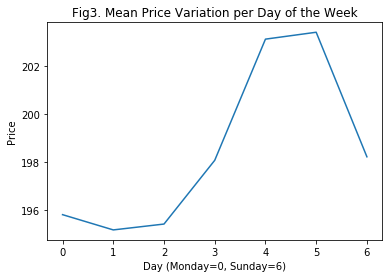

In [50]:
calendar_avail.groupby('priceDayofweek').mean().price.plot();

# Customize the plot
plt.title("Fig3. Mean Price Variation per Day of the Week")
plt.xlabel("Day (Monday=0, Sunday=6)")
plt.ylabel("Price");

During the weekend, the prices are higher than the weekdays. Another way of saving money is renting from Monday to Thursday.

## Question 2:

### How neighborhood and review scores rating relate with each other?

The neighbourhood is an important option to select, so in this case, this variable will be compared with the review_scores_rating to see the effect of each other. Moreover, the frecuency of the neighborhood will be included in the table. 

In [51]:
# read listings dataset
listings = pd.read_csv("./listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [52]:
# Top ten of the host_neighbourhood
listings['host_neighbourhood'].value_counts()[:10]

Allston-Brighton    375
Jamaica Plain       319
Back Bay            312
Fenway/Kenmore      290
South End           233
Dorchester          218
South Boston        198
Beacon Hill         194
Roxbury             143
North End           126
Name: host_neighbourhood, dtype: int64

In [53]:
# A new dataframe will be create to include the mean, max, and min of the review_scores_rating grouped by the 
# host_neighbourhood. The frequency also will be included.

neighbour_rate = pd.DataFrame()
neighbour_rate['mean_rate'] = round(listings.groupby('host_neighbourhood')['review_scores_rating'].mean(), 1)
neighbour_rate['max_rate'] = listings.groupby('host_neighbourhood')['review_scores_rating'].max()
neighbour_rate['min_rate'] = listings.groupby('host_neighbourhood')['review_scores_rating'].min()
neighbour_rate['frequency'] = listings['host_neighbourhood'].value_counts()

# Top twenty of the new dataframe
neigh_rate = neighbour_rate.sort_values('frequency', ascending = False)[:20]
neigh_rate.to_csv("neigh_rate.csv")
neigh_rate

,mean_rate,max_rate,min_rate,frequency
host_neighbourhood,,,,
Allston-Brighton,90.7,100.0,20.0,375
Jamaica Plain,94.7,100.0,60.0,319
Back Bay,91.6,100.0,60.0,312
Fenway/Kenmore,89.0,100.0,40.0,290
South End,94.5,100.0,60.0,233
Dorchester,89.5,100.0,20.0,218
South Boston,94.4,100.0,70.0,198
Beacon Hill,93.2,100.0,64.0,194
Roxbury,90.0,100.0,60.0,143


In [54]:
# The mean of the mean_rate
round(neigh_rate['mean_rate'].mean(), 2)

91.87

This table helps to choose the neighbourhood most visited and the relation with the review scores rating of each one.

## Questions 3:

### What are the rules, facilities and room type most offered?

Let's start with rules, so the house_rules column has the information needed. 

In [55]:
# Checking house_rules to see what are the rules considered
rules = listings.house_rules.value_counts().reset_index()
rules.head()

,index,house_rules
0,House Rules 1. Check-in is 4 pm local time. If...,44
1,Please remember that this is a residential bui...,41
2,No Smoking No Pets,39
3,Please remember that this is a residential bui...,26
4,No Smoking,16


In [56]:
# To clean this variable, due to some rules are in uppercase, let's change everything to lowercase.
rules['index'] = rules['index'].str.lower()
rules.head()

,index,house_rules
0,house rules 1. check-in is 4 pm local time. if...,44
1,please remember that this is a residential bui...,41
2,no smoking no pets,39
3,please remember that this is a residential bui...,26
4,no smoking,16


In [57]:
# List of the different rules
possible_rules = ["no smoking", "no pets", "no parties", "noise", "loud", "drinking"]

In [58]:
# The clean up process starts extracting the possible rules 
rules_group = rules['index'].str.extractall('({0})'.format('|'.join(possible_rules)))

# Create a column name
rules_group.columns = ['new_rule']

# Count the number of the possible rules and rename the dataframe
rules_group = pd.DataFrame(rules_group['new_rule'].value_counts()).reset_index()
rules_group.rename(columns={'index': 'rule', 'new_rule': 'count'}, inplace=True)

# Include the percentage
rules_group['perc'] = round(rules_group['count'] / np.sum(rules_group['count']), 2)
rules_group

,rule,count,perc
0,no smoking,979,0.43
1,no pets,444,0.20
2,noise,279,0.12
3,no parties,278,0.12
4,loud,233,0.10
5,drinking,46,0.02


`no smocking` is the most frequent rule and then `no pets` and `no parties`. We can see that hosts require to be polite and avoid bad habits, and unfortunately if a guest wants to bring his or her pet has to search for a especific place that allow it. 

What is the most room type offered?

In [59]:
listings.room_type.value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

Entire home/apt is the most offered room type.

In [60]:
# Let's see a cross tabulation between room_type and bedrooms
pd.crosstab(listings['room_type'], listings['bedrooms'])

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0
room_type,,,,,,
Entire home/apt,287,921,693,155,45,16
Private room,0,1378,0,0,0,0
Shared room,0,80,0,0,0,0


Private room as a room type with just one bedroom are the most required homestay. 

In [61]:
listings.bedrooms.value_counts()

1.0    2379
2.0     693
0.0     287
3.0     155
4.0      45
5.0      16
Name: bedrooms, dtype: int64

As we saw before, one bedroom is in the top of bedroom. Moreover, 2379 one-bedroom are dividen into room type in the following way: 921 for Entire home/apt, 1378 for Private roon and 80 for Shared room, which by the way are the least required.